In [2]:
import math as m
from tqdm import tqdm
import optuna


from utils import (
    np,
    deepcopy,
)

from utils import (
    norm_1_vec,
    norm_1,
    norm_2_vec,
    norm_2,
    norm_3_vec,
    norm_3,
    norm_spectral,
    count_norms,
)

from utils import (
    make_B_b,
    make_F_H,
    make_B__b_,
    check_norm,
)
import matplotlib.pyplot as plt
import seaborn as sns


# вариант 15. Онбаев Бауржан


## Решение СЛАУ. Ax = y


In [3]:
eps = 1e-3


In [4]:
# 15 вариант
A = np.array(
    [
        [0.63, -1.72, 3.37],
        [-1.72, -2.27, 1.62],
        [3.37, 1.62, -0.43],
    ]
)
x_init = np.full(3, 0.0).reshape(-1, 1)
y = np.array([-0.75, 1.27, 2.74]).reshape(-1, 1)


In [5]:
exact_x = np.linalg.inv(A) @ y
exact_x


array([[ 2.84182382],
       [-5.11311051],
       [-3.36347154]])

код в вольфрам для нахождения матрицы U
```
u_11^2+u_12^2+u_13^2 = 0.63, u_12*u_22+u_13*u_23 = -1.72, u_13 * u_33 = 3.37, u_22 ^2 + u_23 ^ 2 = -2.27, u_23 * u_33 = 1.62, u_33 ^ 2 = -0.43
```

код в вольфрам для нахождения z
```
33iz_3/50 = 2.74, -1.96z_2 - 2.47iz_3 = 1.27, -2.09iz_1 - 5.6z_2 - 5.14iz_3 = -0.75
```

код в вольфрам для нахождения x
```
-2.09ix_1 = -5.9i, -(140x_1 + 49x_2) / 25 = -5.88, - (514ix_1 + 247ix_2 - 66ix_3) / 100 = -4.15i
```


In [6]:
x = np.array([2.82, -5.07, -3.26]).reshape(-1, 1)
x


array([[ 2.82],
       [-5.07],
       [-3.26]])

In [7]:
# норма разницы между точным ответом и тем,
# что получился у меня при решении методом квадратного корня
display(
    norm_1_vec(x - exact_x),
    norm_2_vec(x - exact_x),
    norm_3_vec(x - exact_x),
)


0.10347153733111503

0.16840586381991285

0.11419787233444563

## 2-ое задание на метод итераций для СЛАУ

In [31]:
B = np.array(
    [
        [0.23, -0.14, 0.06, -0.12],
        [0.12, 0, 0.32, -0.18],
        [0.08, -0.12, 0.23, 0.32],
        [0.25, 0.22, 0.14, 0.0],
    ]
)
b = np.array([1.21, -0.72, -0.58, 1.56]).reshape(-1, 1)


In [32]:
print(f"B\n{B}", end="\n" * 2)
print(f"b\n{b}")


B
[[ 0.23 -0.14  0.06 -0.12]
 [ 0.12  0.    0.32 -0.18]
 [ 0.08 -0.12  0.23  0.32]
 [ 0.25  0.22  0.14  0.  ]]

b
[[ 1.21]
 [-0.72]
 [-0.58]
 [ 1.56]]


In [33]:
q_collection = count_norms(B)
# нормы меньше 1, то метод сходится
# работать буду с 1-ой нормой
q = q_collection[0]


In [34]:
def mi(B, b, x):
    return B @ x + b


In [35]:
# метод сходится при любой начальной инициализации x, так что положим x=0
x_0 = np.zeros(4).reshape(-1, 1)
x = mi(B, b, x_0)

print(f"x_0\n{x_0}")
print(f"x_1\n{x}")


x_0
[[0.]
 [0.]
 [0.]
 [0.]]
x_1
[[ 1.21]
 [-0.72]
 [-0.58]
 [ 1.56]]


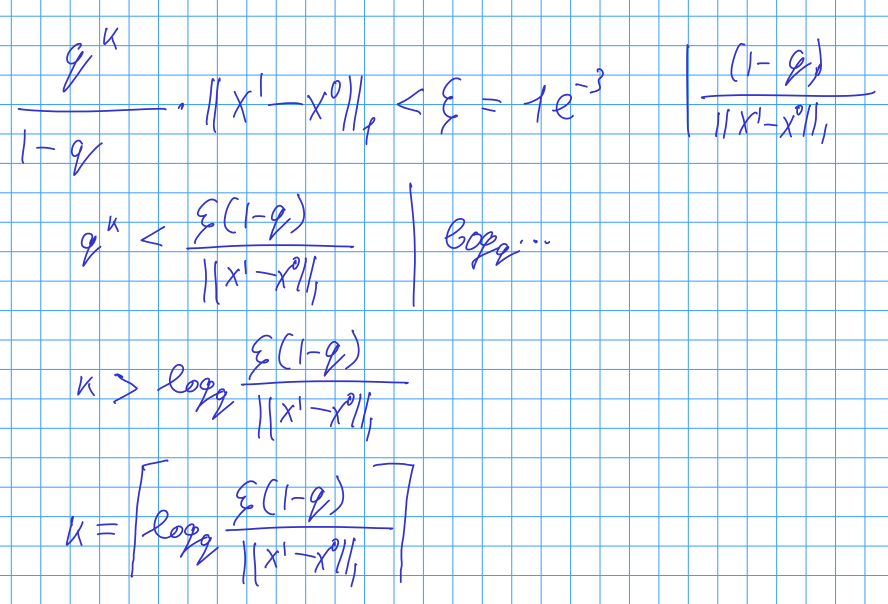

In [36]:
n1 = norm_1_vec(x - x_0)

k = m.ceil(np.log(eps * (1 - q) / n1) / np.log(q))
print(f"k = {k}")


k = 31


In [37]:
# будем считать решение с очень большим приближением эталонным
exact_x = x_0.copy()
for _ in range(int(1e4)):
    exact_x = mi(B, b, exact_x)


In [38]:
x = x_0.copy()
norms = []

for _ in range(k):
    x = mi(B, b, x)
    norms.append(norm_1_vec(x - exact_x))


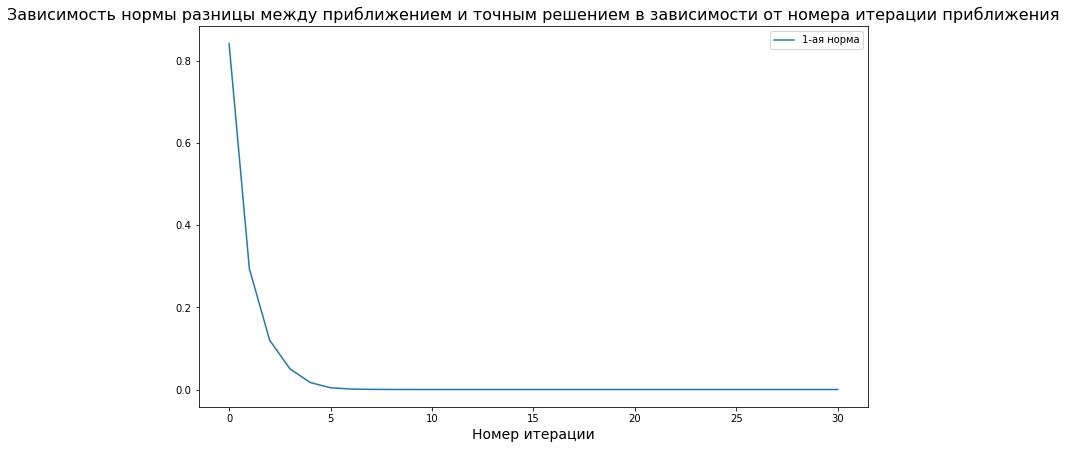

In [39]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(range(k)), y=norms, label="1-ая норма")
plt.title(
    "Зависимость нормы разницы между приближением и точным решением в зависимости от номера итерации приближения",
    fontsize=16,
)
plt.xlabel("Номер итерации", fontsize=14)
plt.show()


### Ответ (2-ое задание на метод итераций)

In [40]:
print(f"ответ:\n{x}")


ответ:
[[ 1.45558303]
 [-0.78300921]
 [ 0.26327984]
 [ 1.78849291]]


## 3-е задание. Метод Зейделя 1-ый вариант



*   List item
*   List item

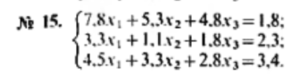

In [41]:
# Ax = y

A = np.array(
    [
        [7.8, 5.3, 4.8],
        [3.3, 1.1, 1.8],
        [4.5, 3.3, 2.8],
    ]
)
y = np.array([1.8, 2.3, 3.4]).reshape(-1, 1)

exact_x = np.linalg.inv(A) @ y


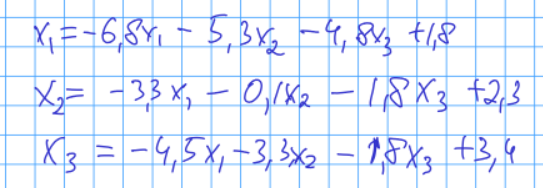

In [19]:
D = np.random.randn(3, 3)
print(count_norms(D))
D_norm = np.linalg.norm(D)
D = D / D_norm
print(count_norms(D))
D /= 10
print(count_norms(D))


[3.29874429 3.04330866 2.47012023]
[1.15619508 1.06666604 0.86576606]
[0.11561951 0.1066666  0.08657661]


In [65]:
for i in range(3):
    y[i] /= A[i, i]
    A[i] /= A[i, i]

B = -np.copy(A)
for i in range(3):
    B[i, i] += 1
b = np.copy(y)


In [22]:
def objective(trial):
    tau = trial.suggest_float("tau", 0.000001, 1)
    C = np.array(
        [
            [
                trial.suggest_float("a_11", -10, 10),
                trial.suggest_float("a_12", -10, 10),
                trial.suggest_float("a_13", -10, 10),
            ],
            [
                trial.suggest_float("a_21", -10, 10),
                trial.suggest_float("a_22", -10, 10),
                trial.suggest_float("a_23", -10, 10),
            ],
            [
                trial.suggest_float("a_31", -10, 10),
                trial.suggest_float("a_32", -10, 10),
                trial.suggest_float("a_33", -10, 10),
            ],
        ]
    )
    A = np.array(
        [
            [7.8, 5.3, 4.8],
            [3.3, 1.1, 1.8],
            [4.5, 3.3, 2.8],
        ]
    )
    y = np.array([1.8, 2.3, 3.4]).reshape(-1, 1)

    A = tau * C @ A
    y = tau * C @ y

    B = np.eye(3) - A
    b = y

    F, H = make_F_H(B)
    B_, b_ = make_B__b_(F, H, b)

    q_col = count_norms(B_)

    return np.min(q_col[:2])


In [23]:
study = optuna.create_study()
study.optimize(objective, n_trials=1000)

study.best_params, study.best_value


[I 2023-04-06 07:51:31,647] A new study created in memory with name: no-name-7887accb-052f-434d-85ac-6dbb0a54d6f1
[I 2023-04-06 07:51:31,657] Trial 0 finished with value: 114155.04647126037 and parameters: {'tau': 0.9438445417747148, 'a_11': -7.456325356940465, 'a_12': 0.5179282139572798, 'a_13': 3.929947698362625, 'a_21': -6.824030544969453, 'a_22': -9.164610807914428, 'a_23': -5.518759915184979, 'a_31': 7.473640577523643, 'a_32': 4.102894762480762, 'a_33': -4.311960735944471}. Best is trial 0 with value: 114155.04647126037.
[I 2023-04-06 07:51:31,660] Trial 1 finished with value: 6188.910250426479 and parameters: {'tau': 0.5444021738260152, 'a_11': -9.61258620536812, 'a_12': 7.460244201074058, 'a_13': 7.2018778355920645, 'a_21': 8.157834405535397, 'a_22': 7.484473991213701, 'a_23': 2.1698796662578275, 'a_31': -0.23118113438267152, 'a_32': -1.3918928580956482, 'a_33': -4.658814046775599}. Best is trial 1 with value: 6188.910250426479.
[I 2023-04-06 07:51:31,666] Trial 2 finished with 

({'tau': 2.2339062488834085e-06,
  'a_11': -0.05622101039295613,
  'a_12': 0.27157721112763755,
  'a_13': 6.61920667757243,
  'a_21': 8.632014130520188,
  'a_22': 9.327661261441868,
  'a_23': -2.276452216170518,
  'a_31': 7.828929621199994,
  'a_32': -8.748271248460206,
  'a_33': 0.7868859453609043},
 1.0002037617589505)

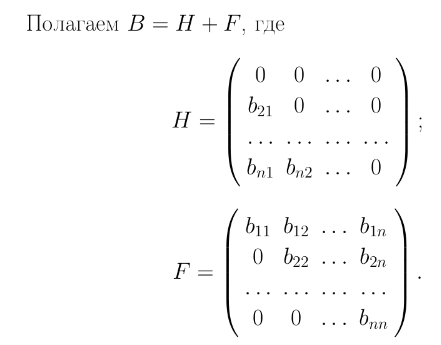

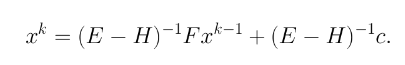

In [24]:
B, b = make_B_b(A, y)
F, H = make_F_H(B)
B_, b_ = make_B__b_(F, H, b)


In [25]:
print(f"B_\n{B_}")
print(f"b_\n{b_}")


B_
[[ -6.8    -5.3    -4.8  ]
 [ 22.44   17.39   14.04 ]
 [-43.452 -33.537 -26.532]]
b_
[[ 1.8  ]
 [-3.64 ]
 [ 7.312]]


In [26]:
# посмотрим на нормы матрицы B_
q_collection = count_norms(B_)
q = q_collection[1]
q_collection, q


(array([103.521     ,  72.692     ,  69.40349987]), 72.69199999999995)

In [27]:
x_0 = np.zeros(B_.shape[0]).reshape(-1, 1)
x_1 = mi(B_, b_, x_0)
x_0, x_1


(array([[0.],
        [0.],
        [0.]]),
 array([[ 1.8  ],
        [-3.64 ],
        [ 7.312]]))

In [28]:
norms = [[] for _ in range(3)]

iterations = int(1e3)
x = np.copy(x_0)
for _ in range(iterations):
    x = mi(B_, b_, x)
    norms[0].append(norm_1_vec(x - exact_x))
    norms[1].append(norm_2_vec(x - exact_x))
    norms[2].append(norm_3_vec(x - exact_x))


/home/baurzhan/Source/repos/kpfu_3_course_numerical_analisys/2_sem_cw_1/utils.py:17: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(x**2))
/tmp/ipykernel_279754/902602679.py:2: RuntimeWarning: overflow encountered in matmul
  return B @ x + b
/tmp/ipykernel_279754/902602679.py:2: RuntimeWarning: invalid value encountered in matmul
  return B @ x + b


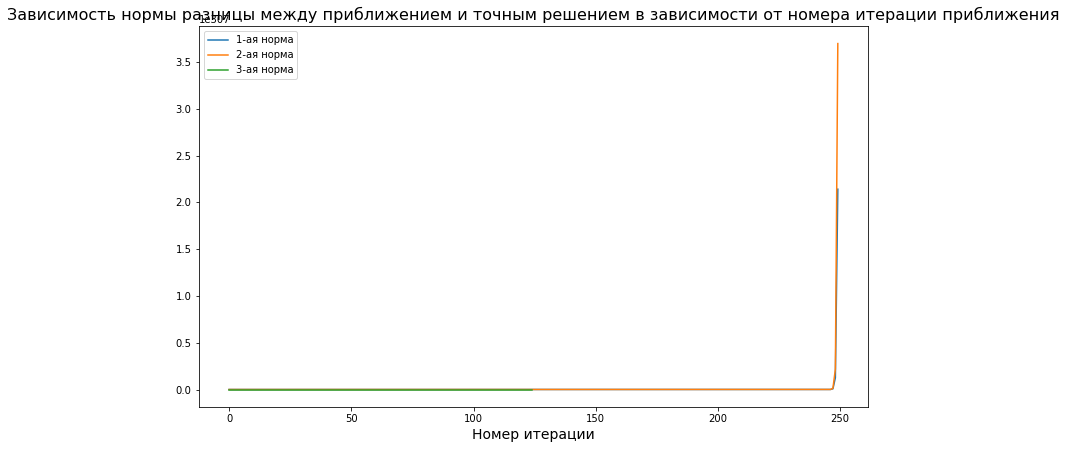

In [29]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(range(iterations)), y=norms[0], label="1-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[1], label="2-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[2], label="3-ая норма")
plt.title(
    "Зависимость нормы разницы между приближением и точным решением в зависимости от номера итерации приближения",
    fontsize=16,
)
plt.xlabel("Номер итерации", fontsize=14)
plt.show()
